# 📊 Customer Churn Prediction

## 🗓️ Date
April 8, 2025

## 🧠 Project Objective
The goal of this project is to build a machine learning model that predicts whether a customer is likely to churn or not. Customer churn refers to when a customer stops using a company’s product or service.

Predicting churn helps businesses:
- Retain existing customers
- Improve customer experience
- Reduce marketing costs by targeting high-risk customers

---

## 🗂️ Dataset Overview
Since I do not have access to a Cambodian dataset, I’ll use the **Telco Customer Churn dataset** from IBM Sample Data, which includes:
- Customer demographics
- Account details
- Services subscribed
- Churn label (Yes/No)

We'll later replace or compare it with real local data if available.

**Source**: [Kaggle – Telco Customer Churn Dataset](https://www.kaggle.com/blastchar/telco-customer-churn)

---

# 📊 Exploratory Data Analysis (EDA)

### 1.Install require libraries,Load Data, Data Understanding 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [4]:
data = pd.read_csv('../Customer Churn Prediction /data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In this data containing 21 columns with 7043 entries. I also notice that, most columns are type(object),beyond this there are some incorrect data types in some columns which will address later.

In [6]:
#descriptive statistics
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


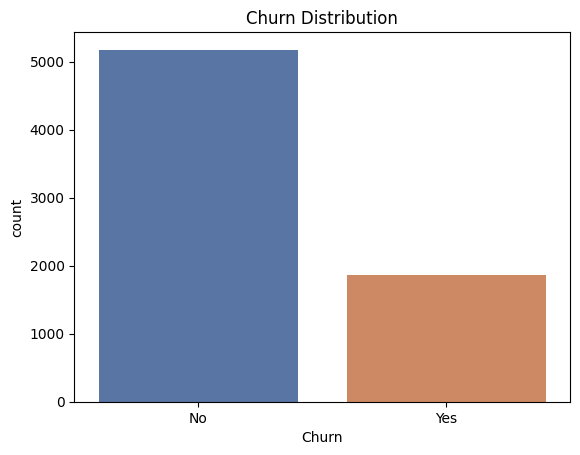

In [7]:
sns.countplot(x='Churn', data=data, hue='Churn',palette='deep')
plt.title('Churn Distribution')
plt.show()

**Insight**: Based on Churn Distribution,we can clearly see that, there are less Churn, meaning that the classed are slightly imbalanced, which will further discus in next step. 

## 📈 2. Visual Explorations

Text(0.5, 1.0, 'Churn by Payment Method')

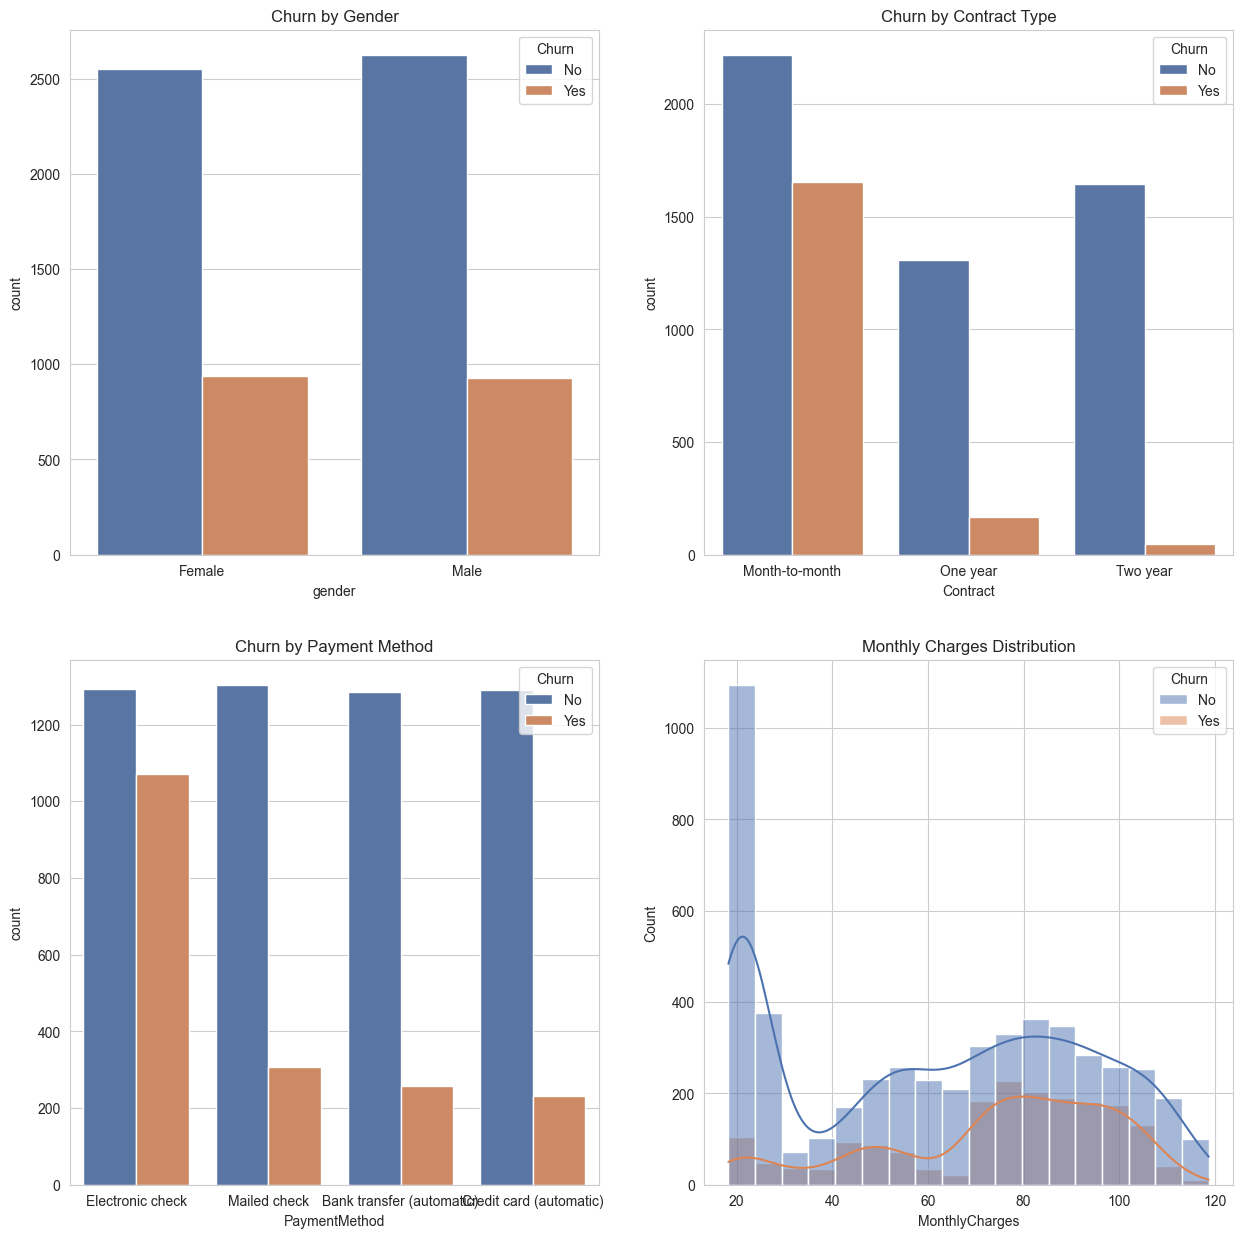

In [8]:
#Churn VS gender distribution
sns.set_style('whitegrid')
fig, axes = plt.subplots(2,2, figsize=(15, 15))
fig = sns.countplot(data=data,x='gender', hue='Churn',palette='deep',legend=True,ax=axes[0,0])
fig.set_title('Churn by Gender')
#Churn vs Contract types 
fig = sns.countplot(data=data,x='Contract', hue='Churn',palette='deep',legend=True,ax=axes[0,1])
fig.set_title('Churn by Contract Type')
#Monthly charges Distribution
fig = sns.histplot(data=data,x='MonthlyCharges',kde=True,hue='Churn',palette='deep',legend=True,ax=axes[1,1])
fig.set_title('Monthly Charges Distribution')
#Churn vs Payment Method
fig = sns.countplot(data=data,x='PaymentMethod',hue='Churn',palette='deep',legend=True,ax=axes[1,0])
fig.set_title('Churn by Payment Method')


## Interpretation:
1. **Churn by Gender**: There are more male customers who not churn, while both male and female who churn are almost the same.
---
2. **Churn by ContractTypes**: Most churn customers are in Month-to-Month contract types, while one year and two year contract are little. 
--- 
3. **Churn by PaymentMethod**: Customers who churn the most are in **Electronic Check** payment method. 
---
4. **Monthly Charge Distribution**: Most customers paying less than **30$/month** have very low churn. This plot also indates the trend that customers who paying more **(60$-100$)** are more likely to churn.

## 3. 🚀 Data Cleaning & Preprocessing

### 🎯 Goal:
Prepare the dataset for modeling by:
- Handling missing values
- Converting categorical variables
- Encoding target
- Scaling numerical features

In [9]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing value found. 

In [10]:
#Data type conversion
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].isna().sum()
#Dropping missing values
data.dropna(inplace=True)

In [11]:
#Drop unnecessary columns 
data.drop(['customerID'], axis=1, inplace=True)

In [12]:
#Encoding categorical variables
data = data.replace({'Yes': 1, 'No': 0})
data = pd.get_dummies(data, drop_first=True)


/var/folders/kd/y4dd_m917sjclbk19n2xcbjr0000gn/T/ipykernel_28347/2778703221.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Yes': 1, 'No': 0})


In [13]:
data.head(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_No internet service,StreamingTV_1,StreamingTV_No internet service,StreamingMovies_1,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,False,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False
5,0,0,0,8,1,1,99.65,820.50,1,False,...,False,True,False,True,False,False,False,False,True,False
6,0,0,1,22,1,1,89.10,1949.40,0,True,...,False,True,False,False,False,False,False,True,False,False
7,0,0,0,10,0,0,29.75,301.90,0,False,...,False,False,False,False,False,False,False,False,False,True
8,0,1,0,28,1,1,104.80,3046.05,1,False,...,False,True,False,True,False,False,False,False,True,False
9,0,0,1,62,1,0,56.15,3487.95,0,True,...,False,False,False,False,False,True,False,False,False,False


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   PaperlessBilling                       7032 non-null   int64  
 6   MonthlyCharges                         7032 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7032 non-null   int64  
 9   gender_Male                            7032 non-null   bool   
 10  MultipleLines_1                        7032 non-null   bool   
 11  MultipleL

#  Model Building and Evaluation

In [15]:
#Import Require Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## ⚙️ Train Models

In [ ]:
#Logistic Regression Model
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [19]:
#Random Forest Classifier Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 📊 Evaluate Models

In [23]:
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.58      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



In [24]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



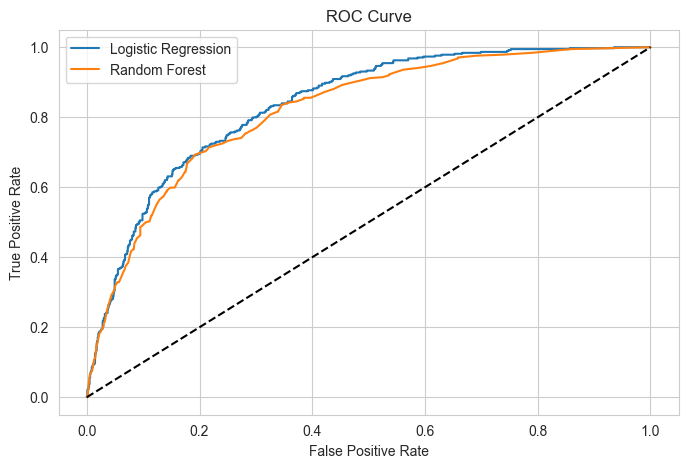

In [25]:
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 5))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Interpretation 
The ROC curve of Logistic Regression is above that of Random Forest.
So, Logistic Regression has a higher AUC, meaning it is better at distinguishing between the classes.

## ✅ Final Conclusion

- ✅ **Logistic Regression** outperformed **Random Forest** in both:
  - ROC-AUC performance
  - Class 1 F1-score and overall accuracy
- It is also **simpler and more interpretable**.
- Therefore, **Logistic Regression is the preferred model** for this classification task.

---
